### Spam Classifier

In [32]:
import pandas as pd 
messages = pd.read_csv("spam", sep = '\t', names = ['label', "messages"])
print(messages)

     label                                           messages
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [33]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()   
corpus = []
for i in range(0, len(messages)):
   review = re.sub('[^a-zA-Z]', " ", messages['messages'][i])
   review = review.lower()
   review = review.split()

   review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
   review = " ".join(review)
   corpus.append(review)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(corpus).toarray()

print(x.shape)

(5572, 5000)


In [35]:
y = pd.get_dummies(messages['label']) # converting into integers (binary)
print(y)
y = y.iloc[:, 1].values # we just need one column 1->spam
print(y)

        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]
[False False  True ... False False False]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Training model using Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)

In [38]:
y_pred = spam_detect_model.predict(x_test)
print(y_pred)

[False  True False ... False  True False]


In [39]:
print(y_test)

[False  True False ... False  True False]


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test, y_pred)

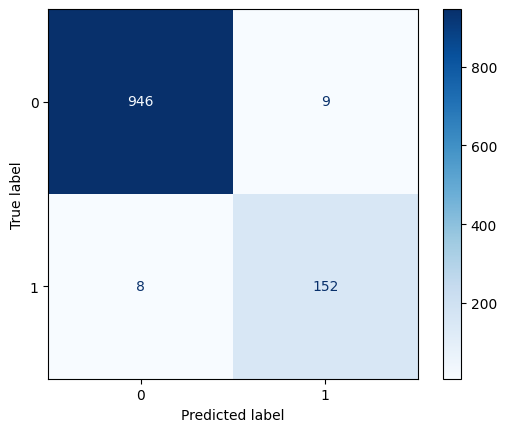

In [41]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cf)
cmd.plot(cmap='Blues')

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9847533632286996


In [43]:
import pickle

# Save the trained model to a file using pickle
with open('spam_detect_model.pkl', 'wb') as file:
   pickle.dump(spam_detect_model, file)

# Save the CountVectorizer to a file
with open('count_vectorizer.pkl', 'wb') as file:
   pickle.dump(cv, file)